In [1]:
from shapely.geometry import mapping, shape
# from fiona import collection

# with collection("VIC_LOCALITY_POLYGON_shp.shp", "r") as input:
    

In [2]:
# https://stackoverflow.com/questions/36399381/whats-the-fastest-way-of-checking-if-a-point-is-inside-a-polygon-in-python
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [3]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

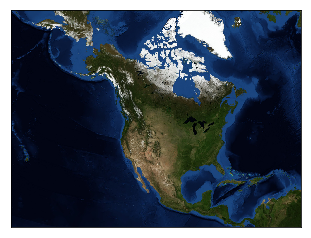

In [4]:
# source activate TEST
# conda install basemap

# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

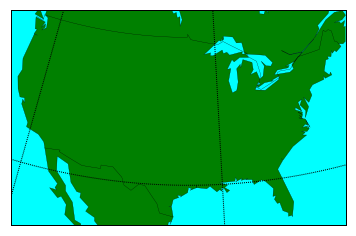

In [5]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from matplotlib.collections import LineCollection
from matplotlib.colors import rgb2hex

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,
            urcrnrlon=-64, urcrnrlat=49,
            projection='lcc', lat_1=33,lat_2=45,lon_0=-95)

m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)
m.fillcontinents(color='green',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
m.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))
plt.show()

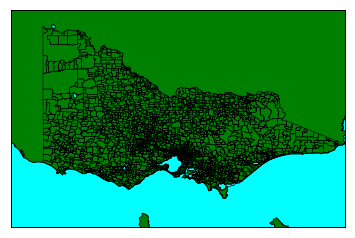

In [12]:
# map = Basemap(llcrnrlon=39,llcrnrlat=-8,
#             urcrnrlon=147, urcrnrlat=-70,
#             projection='lcc', lat_1=-20, lon_0=134)

# # too far (too small)
# map = Basemap(width=12000000, height=9000000,
#             resolution='l', projection='eqdc',
#             lat_1=0, lat_2=-40, lat_0=-24, lon_0=140)

map = Basemap(llcrnrlon=140,llcrnrlat=-40,urcrnrlon=150,urcrnrlat=-33.5,
            resolution='i')#,projection='aea',
            #lat_1=0, lat_2=-40, lat_0=-24, lon_0=140)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='green',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('VIC_LOCALITY_POLYGON_shp', 'VIC')#, drawbounds = False)

'''
lightning_info = map.readshapefile('../sample_files/lightnings', 'lightnings')

print lightning_info

for info, lightning in zip(map.lightnings_info, map.lightnings):
    if float(info['amplitude']) < 0:
        marker = '_'
    else:
        marker = '+'
    map.plot(lightning[0], lightning[1], marker=marker, color='m', markersize=8, markeredgewidth=2)
'''

plt.show()

In [13]:
# import shapefile
# shape = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.shp")
# #first feature of the shapefile
# feature = shape.shapeRecords()[0]
# first = feature.shape.__geo_interface__  
# print(first) # (GeoJSON format)
# {'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

In [14]:
# import shapefile
# shape = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.shx")
# #first feature of the shapefile
# feature = shape.shapeRecords()[0]
# first = feature.shape.__geo_interface__  
# print(first) # (GeoJSON format)
# {'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

In [15]:
# import shapefile
# shape = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.prj")
# #first feature of the shapefile
# feature = shape.shapeRecords()[0]
# first = feature.shape.__geo_interface__  
# print(first) # (GeoJSON format)
# {'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

In [16]:
# import shapefile
# shape = shapefile.Reader("VIC_LOCALITY_POLYGON_shp.dbf")
# #first feature of the shapefile
# feature = shape.shapeRecords()[0]
# first = feature.shape.__geo_interface__  
# print(first) # (GeoJSON format)
# {'type': 'LineString', 'coordinates': ((0.0, 0.0), (25.0, 10.0), (50.0, 50.0))}

In [1]:
import shapefile
from shapely.geometry import Point, shape

# read all files called 'VIC_LOCALITY_POLYGON_shp'
shapefile = shapefile.Reader("VIC_LOCALITY_POLYGON_shp") 

In [2]:
# check the first data and we can see the suburb name is in the index 6
print(shapefile.records()[0]) # records: text info
print(len(shapefile.records())) # check the data size

# shapeRecords() method can simultaneously loop through both the geometry and records of a shapefile 
print(shapefile.shapeRecords()[0]) # shaperecords: latitude & longitude
print(len(shapefile.shapeRecords()))  # check the data size

['6670', datetime.date(2011, 8, 31), None, 'VIC2615', datetime.date(2012, 4, 27), None, 'UNDERBOOL', '', '', 'G', None, '2']
2973
2973


In [3]:
# fetch the first suburb
each_feature = shapefile.shapeRecords()[1]

# convert the type which can be used by shapely
geo = each_feature.shape.__geo_interface__
shapely_polygon = shape(geo) 

# fetch the lat & lng
point = Point(144.961527, -37.823596)

# fetch the suburb name from the index 6
suburb = shapefile.records()[1][6]

# check if the point is in the specific suburb
if shapely_polygon.contains(point):
    print("This property is in", suburb)
else:
    print("This property is not in", suburb)

This property is not in NURRAN


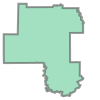

In [4]:
shapely_polygon

### get lat & lng

In [49]:
import shapefile
pts = shapefile.Reader("VIC_LOCALITY_POLYGON_shp")
polys = shapefile.Reader("VIC_LOCALITY_POLYGON_shp")
points = [pt.shape.__geo_interface__ for pt in pts.shapeRecords()]
multi = shape(polys.shapeRecords()[0].shape.__geo_interface__) # 1 polygon
# print(multi)
# MULTIPOLYGON (((-0.5275288092189501 0.5569782330345711, -0.117797695262484 0.2906530089628682, -0.2560819462227913 0.01920614596670933, -0.7093469910371319 -0.08834827144686286, -0.8629961587708066 0.1830985915492958, -0.734955185659411 0.3982074263764405, -0.5275288092189501 0.5569782330345711)), ((0.1997439180537772 0.06017925736235596, 0.5480153649167734 0.1293213828425096, 0.729833546734955 0.03969270166453265, 0.8143405889884763 -0.1395646606914211, 0.701664532650448 -0.3854033290653009, 0.4763124199743918 -0.5006402048655569, 0.2688860435339309 -0.4238156209987196, 0.1895006402048656 -0.2291933418693981, 0.1997439180537772 0.06017925736235596)), ((-0.3764404609475033 -0.295774647887324, -0.1152368758002562 -0.3597951344430217, -0.03329065300896294 -0.5800256081946222, -0.1152368758002562 -0.7413572343149808, -0.3072983354673495 -0.8591549295774648, -0.58898847631242 -0.6927016645326505, -0.6555697823303457 -0.4750320102432779, -0.3764404609475033 -0.295774647887324)))
for i, pt in enumerate(points):
    point = shape(pt)
    if point.within(multi): 
        print(shape(points[i])) # print(i, shape(points[i]))
# for i, pt in enumerate(points):
#     print(i, pt)

POLYGON ((141.74552399 -35.07228701, 141.74552471 -35.07201624, 141.74748471 -35.06367123, 141.74909525 -35.05681288, 141.74917403 -35.05647197, 141.75887404 -35.05225699, 141.77005396 -35.04914101, 141.77057401 -35.04899703, 141.76823304 -35.04349501, 141.76757096 -35.04270197, 141.76709398 -35.03982199, 141.76544215 -35.03808514, 141.76547768 -35.03782986, 141.76408494 -35.03523684, 141.76398063 -35.03505673, 141.76387633 -35.03487661, 141.75923139 -35.02629546, 141.77479178 -35.02631526, 141.77477947 -35.02789069, 141.79121543 -35.02632192, 141.79143466 -35.02629765, 141.79143596 -35.04874003, 141.79351097 -35.04729598, 141.79428796 -35.04709498, 141.79636183 -35.04970131, 141.79864596 -35.05329199, 141.79782903 -35.05527899, 141.79795996 -35.056872, 141.79605705 -35.05895805, 141.79644599 -35.06340397, 141.79743197 -35.06573301, 141.79758596 -35.06874604, 141.79950797 -35.07147102, 141.79989406 -35.07147891, 141.80991892 -35.07149865, 141.81017497 -35.05904903, 141.82738498 -35.059